# Вариант 4. Выбор признаков.
Данный вариант предполагает фокусировку на улучшении модели путем ввода новых признаков в модель. Следует подготовить модель к обучению, обучить модель и зафиксировать начальный уровень эффективности. Затем следует исследовать влияние исключения существующих и введения новых признаков в модель на эффективность. Как вариант можно рассматривать введение полиномиальных признаков. Следует стремиться к максимальному увеличению эффективности модели.

In [ ]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [ ]:
dataset = pd.read_csv('german_credit_data.csv')
dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
dataset.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [ ]:
dataset.describe(include='O')

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


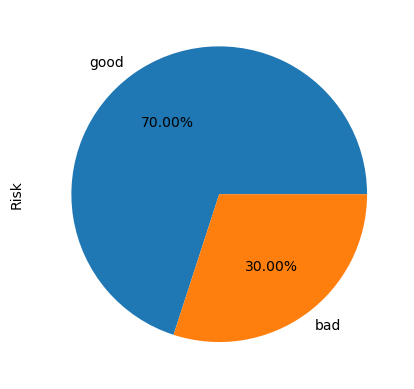

In [ ]:
dataset['Risk'].value_counts().plot(kind='pie',autopct='%.2f%%');

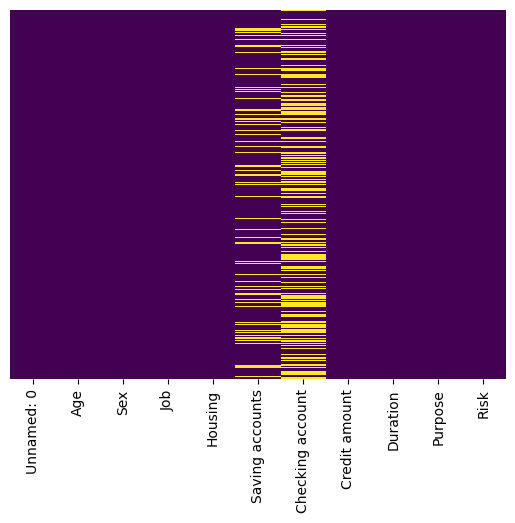

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [ ]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# 1. Удалим пустые значения и воспользуемся LabelEncoder

In [ ]:
dataset_dropna = pd.read_csv('german_credit_data.csv').dropna()
dataset_dropna.reset_index(drop=True)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
dataset['Housing'] = label_encoder.fit_transform(dataset['Housing'])
dataset['Saving accounts'] = label_encoder.fit_transform(dataset['Saving accounts'])
dataset['Checking account'] = label_encoder.fit_transform(dataset['Checking account'])
dataset['Purpose'] = label_encoder.fit_transform(dataset['Purpose'])
dataset['Risk'] = label_encoder.fit_transform(dataset['Risk'])
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,3,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


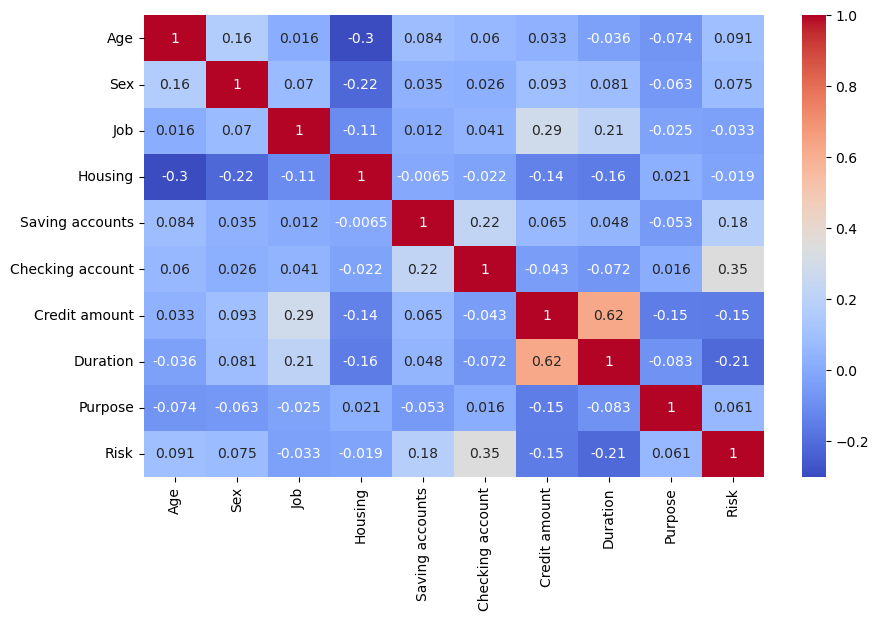

In [ ]:
plt.figure(figsize=(10, 6))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');

In [ ]:
X = dataset.drop('Risk', axis=1)
y = dataset['Risk']

In [ ]:
def train_run_models(X, y):
    metrics = {
        'Accuracy': make_scorer(accuracy_score),
        'Precision': make_scorer(precision_score, average='weighted'),
        'Recall': make_scorer(recall_score, average='weighted'),
        'F1-Score': make_scorer(f1_score, average='weighted'),
        'ROC-AUC': make_scorer(roc_auc_score)
    }

    models = [
        ('Градиентный бустинг', GradientBoostingClassifier())    ]

    acc_dict = {}
    for name, model in models:
        model_scores = {}
        for metric_name, scorer in metrics.items():
            cv_results = cross_val_score(model, X, y, cv=5, scoring=scorer, n_jobs=-1)
            model_scores[metric_name] = cv_results.mean()

        acc_dict[name] = model_scores

    acc_df = pd.DataFrame.from_dict(acc_dict, orient='index')
    display(acc_df)

train_run_models(X, y)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Градиентный бустинг,0.737,0.719601,0.737,0.719052,0.63881


# 2. Заменим пустые значения на моду и применим Label Encoder

In [ ]:
dataset = pd.read_csv('german_credit_data.csv')
for col in dataset.columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)
dataset.drop('Unnamed: 0', axis=1, inplace=True)
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
dataset['Housing'] = label_encoder.fit_transform(dataset['Housing'])
dataset['Saving accounts'] = label_encoder.fit_transform(dataset['Saving accounts'])
dataset['Checking account'] = label_encoder.fit_transform(dataset['Checking account'])
dataset['Purpose'] = label_encoder.fit_transform(dataset['Purpose'])
dataset['Risk'] = label_encoder.fit_transform(dataset['Risk'])
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


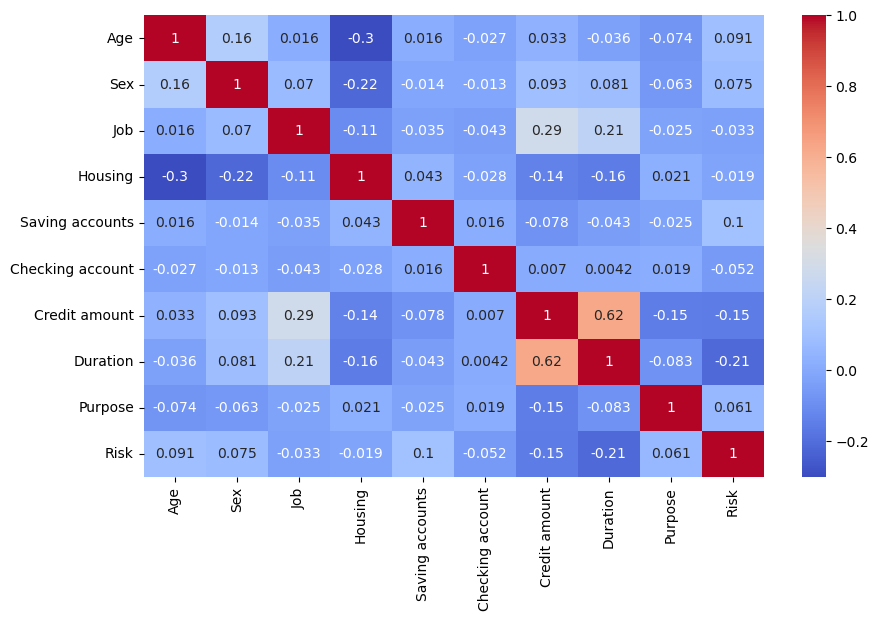

In [ ]:
plt.figure(figsize=(10, 6))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');

In [ ]:
X = dataset.drop('Risk', axis=1)
y = dataset['Risk']

In [ ]:
train_run_models(X, y)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Градиентный бустинг,0.69,0.643492,0.69,0.647765,0.553095


# 3. Теперь вместо Label Encoder применим pd.get_Dummies()

In [ ]:
dataset = pd.read_csv('german_credit_data.csv')
for col in dataset.columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good


In [ ]:
dataset_dummies = pd.get_dummies(dataset, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], drop_first=True)
dataset_dummies['Risk'] = label_encoder.fit_transform(dataset_dummies['Risk'])
dataset_dummies

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


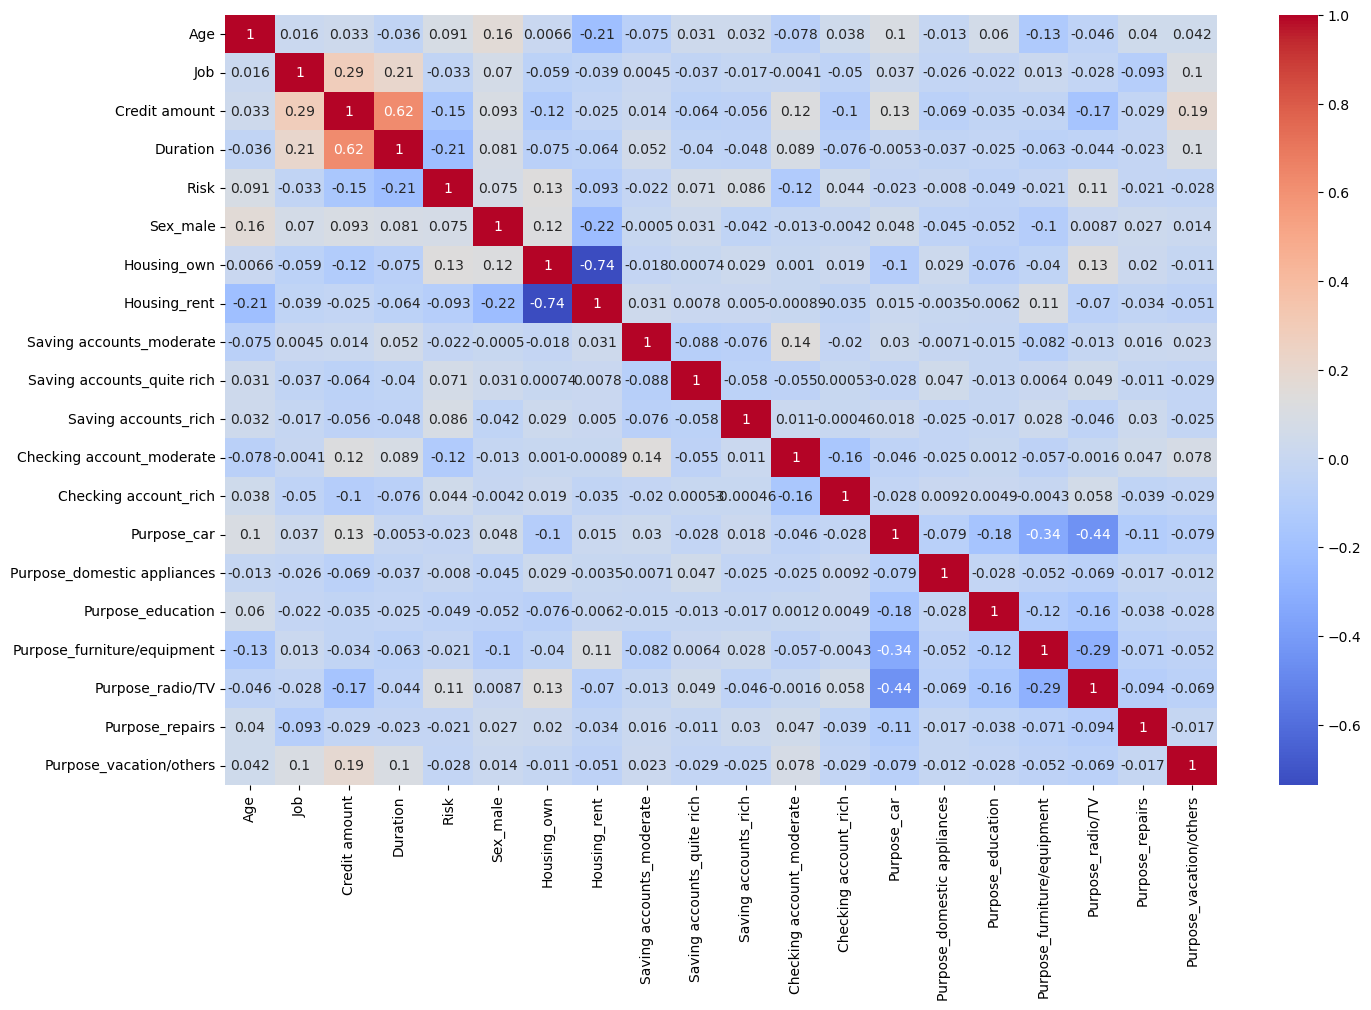

In [ ]:
plt.figure(figsize=(16, 10))
corr = dataset_dummies.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');

In [ ]:
X = dataset_dummies.drop('Risk', axis=1)
y = dataset_dummies['Risk']
X

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_run_models(X, y)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Градиентный бустинг,0.693,0.649614,0.692,0.652641,0.561429


# 4. Применим PolynomialFeatures

In [ ]:
dataset = pd.read_csv('german_credit_data.csv')
for col in dataset.columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)
dataset.drop('Unnamed: 0', axis=1, inplace=True)
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
dataset['Housing'] = label_encoder.fit_transform(dataset['Housing'])
dataset['Saving accounts'] = label_encoder.fit_transform(dataset['Saving accounts'])
dataset['Checking account'] = label_encoder.fit_transform(dataset['Checking account'])
dataset['Purpose'] = label_encoder.fit_transform(dataset['Purpose'])
dataset['Risk'] = label_encoder.fit_transform(dataset['Risk'])
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


In [ ]:
poly = PolynomialFeatures(degree=2)
X = dataset.drop('Risk', axis=1)
y = dataset['Risk']
X = poly.fit_transform(X)
train_run_models(X, y)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Градиентный бустинг,0.707,0.677714,0.71,0.672174,0.577381


# 5. Проверим важность признаков и удалим, которые слабо влияют на модель

In [ ]:
def plot_feature_importance(model, feature_names):
    feature_importance = model.feature_importances_

    # Сортировка признаков по их важности
    sorted_indices = feature_importance.argsort()
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), sorted_feature_importance, align='center')
    plt.yticks(range(len(feature_names)), sorted_feature_names)
    plt.show()

In [ ]:
model_gb = GradientBoostingClassifier()

In [ ]:
X = dataset.drop('Risk', axis=1)
y = dataset['Risk']
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4
996,40,1,3,1,0,0,3857,30,1
997,38,1,2,1,0,0,804,12,5
998,23,1,2,0,0,0,1845,45,5


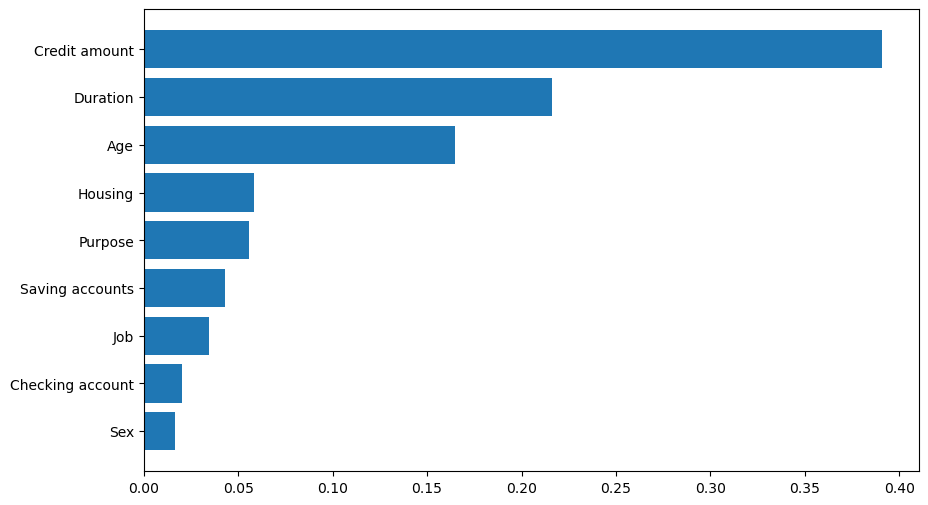

In [ ]:
model_gb.fit(X, y)
plot_feature_importance(model_gb, X.columns)

In [ ]:
X = X[['Credit amount', 'Duration', 'Age', 'Housing', 'Saving accounts']]
y = dataset['Risk']
X

,Credit amount,Duration,Age,Housing,Saving accounts
0,1169,6,67,1,0
1,5951,48,22,1,0
2,2096,12,49,1,0
3,7882,42,45,0,0
4,4870,24,53,0,0
...,...,...,...,...,...
995,1736,12,31,1,0
996,3857,30,40,1,0
997,804,12,38,1,0
998,1845,45,23,0,0


In [ ]:
train_run_models(X, y)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Градиентный бустинг,0.714,0.683069,0.714,0.674017,0.587857


# 6. Уравняем классы целевой переменной и снова проверим важность признаков.

In [ ]:
X = dataset.drop('Risk', axis=1)
y = dataset['Risk']
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4
996,40,1,3,1,0,0,3857,30,1
997,38,1,2,1,0,0,804,12,5
998,23,1,2,0,0,0,1845,45,5


In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
...,...,...,...,...,...,...,...,...,...
1395,25,0,2,1,0,0,1371,23,1
1396,26,0,2,1,0,0,3534,24,4
1397,26,1,2,1,0,0,8226,36,1
1398,26,0,3,0,0,0,8083,35,2


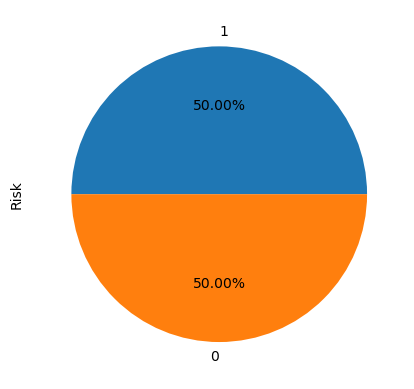

In [ ]:
y.value_counts().plot(kind='pie',autopct='%.2f%%');

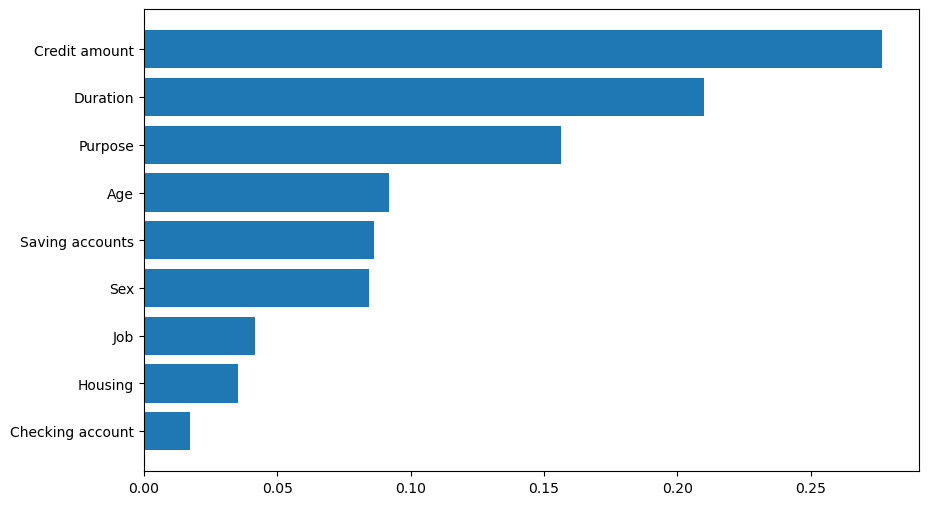

In [ ]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X, y)
plot_feature_importance(model_gb, X.columns)

In [ ]:
X = dataset[['Credit amount', 'Duration', 'Age', 'Housing', 'Saving accounts']]
y = dataset['Risk']
train_run_models(X, y)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Градиентный бустинг,0.713,0.681491,0.714,0.678457,0.587857


In [ ]:
X

,Credit amount,Duration,Age,Housing,Saving accounts
0,1169,6,67,1,0
1,5951,48,22,1,0
2,2096,12,49,1,0
3,7882,42,45,0,0
4,4870,24,53,0,0
...,...,...,...,...,...
995,1736,12,31,1,0
996,3857,30,40,1,0
997,804,12,38,1,0
998,1845,45,23,0,0


In [ ]:
X, y = oversample.fit_resample(X, y)
train_run_models(X, y)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Градиентный бустинг,0.692857,0.698146,0.692857,0.690941,0.692857
